# Tweet Sentiment Prediction using Naive Bayes Classifier

In [113]:
# Read Labelled Training Data 

import xlrd

wb = xlrd.open_workbook('./finaltrainingdata.xls')

sh = wb.sheet_by_index(0)
sentiment = sh.col_values(0) 
tweet = sh.col_values(5) 

In [114]:
#Convert unicode to ascii format

asciiformattweet=[]
for x in tweet:
    try:
        x=str(x).encode('ascii','ignore')
        asciiformattweet.append(x)
    except:
        continue

In [115]:
#

import re

filteredtweet=[]
for each in asciiformattweet:
    #each= pattern.sub(lambda m: rep[re.escape(m.group(0))], str(each))
    remove_hashtag=re.sub(r"(?:#[\w_]+)", "", each)
    remove_mention=re.sub(r"(?:@[\w_]+)", "", remove_hashtag)
    remove_url=re.sub(r"http\S+", "", remove_mention)
    filteredtweet.append(remove_url)


In [116]:
sen=[]
for x in sentiment:
    try:
        x=str(x).encode('ascii','ignore')
        sen.append(x)
    except:
        continue

In [117]:
completelist=zip(filteredtweet, sen)

In [118]:
completelist[1]

("Arrgh! I can't vote for Teen Choice Awards, cause I live in Norway! That's bullshit!! I' so mad right now ",
 'negative')

In [119]:
tweets = []

for (words, sentiment) in completelist:
    words_filtered = [e.lower() for e in words.split() if len(e) >= 3]
    tweets.append((words_filtered, sentiment))

In [110]:
#Get features from the filtered tweets and their frequency distribution

import nltk
def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
        all_words.extend(words)
    return all_words
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features

word_features = get_word_features(get_words_in_tweets(tweets))

In [120]:
# Extract features from feature list

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

training_set = nltk.classify.apply_features(extract_features, tweets)

In [121]:
# Train the Classifier

classifier = nltk.NaiveBayesClassifier.train(training_set)

In [126]:
# Read tweets related to Hillary Clinton

import re
import json
import pandas as pd
from DatumBox import DatumBox
tweets_data_path=[]


tweets_data_path.append('data/hillarytwitterfeed_dec6.txt')
#tweets_data_path.append('data/hillarytwitterfeed_dec6_2.txt')
#tweets_data_path.append('data/hillarytwitterfeed_dec6_3.txt')
#tweets_data_path.append('data/hillarytwitterfeed_dec7_1.txt')
#tweets_data_path.append('data/hillarytwitterfeed_dec7_2.txt')
#tweets_data_path.append('data/hillarytwitterfeed_dec8_1.txt')
#tweets_data_path.append('data/hillarytwitterfeed_dec8_2.txt')
#tweets_data_path.append('data/hillarytwitterfeed_dec8_3.txt')
#tweets_data_path.append('data/hillarytwitterfeed_dec8_4.txt')
#tweets_data_path.append('data/hillarytwitterfeed_dec8_5.txt')
#tweets_data_path.append('data/hillarytwitterfeed_dec8_6.txt')
#tweets_data_path.append('data/hillarytwitterfeed_dec9_1.txt')
#tweets_data_path.append('data/hillarytwitterfeed_dec9_2.txt')

#datum_box = DatumBox("2a08df5439269850bebe32da098fd896")
tweets_data = []
for each in tweets_data_path:
    tweets_file = open(each, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
tweetdata=[]
for each in tweets_data:
    try:
        tweetdata.append(each['text'])
    except:
        continue

print "len is ,",len(tweetdata)


len is , 3251


In [127]:
# Eliminate the irrelevant information from the tweet
import re

filteredtweet=[]
for each in tweetdata:
    #each= pattern.sub(lambda m: rep[re.escape(m.group(0))], str(each))
    remove_hashtag=re.sub(r"(?:#[\w_]+)", "", each)
    remove_mention=re.sub(r"(?:@[\w_]+)", "", remove_hashtag)
    remove_url=re.sub(r"http\S+", "", remove_mention)
    filteredtweet.append(remove_url)
len(filteredtweet)

3251

In [128]:
# Predict the sentiment for the tweet
p=0
n=0
for each in filteredtweet:
    x=classifier.classify(extract_features(each.split()))
    if x=='positive':
        p=p+1
    elif x=='negative':
        n=n+1
print "positive ",p
print "negative ",n

positive  2325
negative  926


In [129]:
# Read tweets related to Trump and applying the same steps as above

import re
import json
import pandas as pd
from DatumBox import DatumBox
tweets_data_path=[]
tweets_data_path.append('data/trumptwitterfeed_dec7_1.txt')
#tweets_data_path.append('data/trumptwitterfeed_dec7_2.txt')
#tweets_data_path.append('data/trumptwitterfeed_dec8_1.txt')
#tweets_data_path.append('data/trumptwitterfeed_dec9_1.txt')
#tweets_data_path.append('data/trumptwitterfeed_dec9_2.txt')
#tweets_data_path.append('data/trumptwitterfeed_dec10_1.txt')
#tweets_data_path.append('data/trumptwitterfeed_dec11_1.txt')

#datum_box = DatumBox("2a08df5439269850bebe32da098fd896")
tweets_data = []
for each in tweets_data_path:
    tweets_file = open(each, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
tweetdata=[]
for each in tweets_data:
    try:
        tweetdata.append(each['text'])
    except:
        continue

print "len is ,",len(tweetdata)


len is , 2626


In [130]:
import re

filteredtweet=[]
for each in tweetdata:
    #each= pattern.sub(lambda m: rep[re.escape(m.group(0))], str(each))
    remove_hashtag=re.sub(r"(?:#[\w_]+)", "", each)
    remove_mention=re.sub(r"(?:@[\w_]+)", "", remove_hashtag)
    remove_url=re.sub(r"http\S+", "", remove_mention)
    filteredtweet.append(remove_url)
len(filteredtweet)

2626

In [33]:
p_t=0
n_t=0
for each in filteredtweet:
    x=classifier.classify(extract_features(each.split()))
    if x=='positive':
        p_t=p_t+1
    elif x=='negative':
        n_t=n_t+1
print "positive ",p_t
print "negative ",n_t

positive  1790
negative  836


In [38]:
# calcuating the positivity score for trump

t_positve_score=float(float(p_t)/float((p_t+n_t)))*100
print t_positve_score

68.1645087586


In [39]:
# calcuating the positivity score for hillary

h_positve_score=float(float(p)/float((p+n)))*100
print h_positve_score

71.1242153319


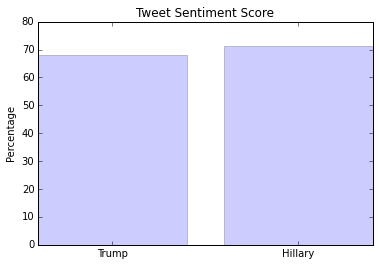

In [96]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Trump', 'Hillary')
y_pos = np.arange(len(objects))
performance = [t_positve_score,h_positve_score]
 
plt.bar(y_pos, performance, align='center', alpha=0.2)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Tweet Sentiment Score')
 
plt.show()